In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data_processed.csv")
y = df['diagnosis']
x = df.drop('diagnosis', axis = 1).to_numpy()

In [3]:
from KMeans import KMeans
kmeans = KMeans(x)

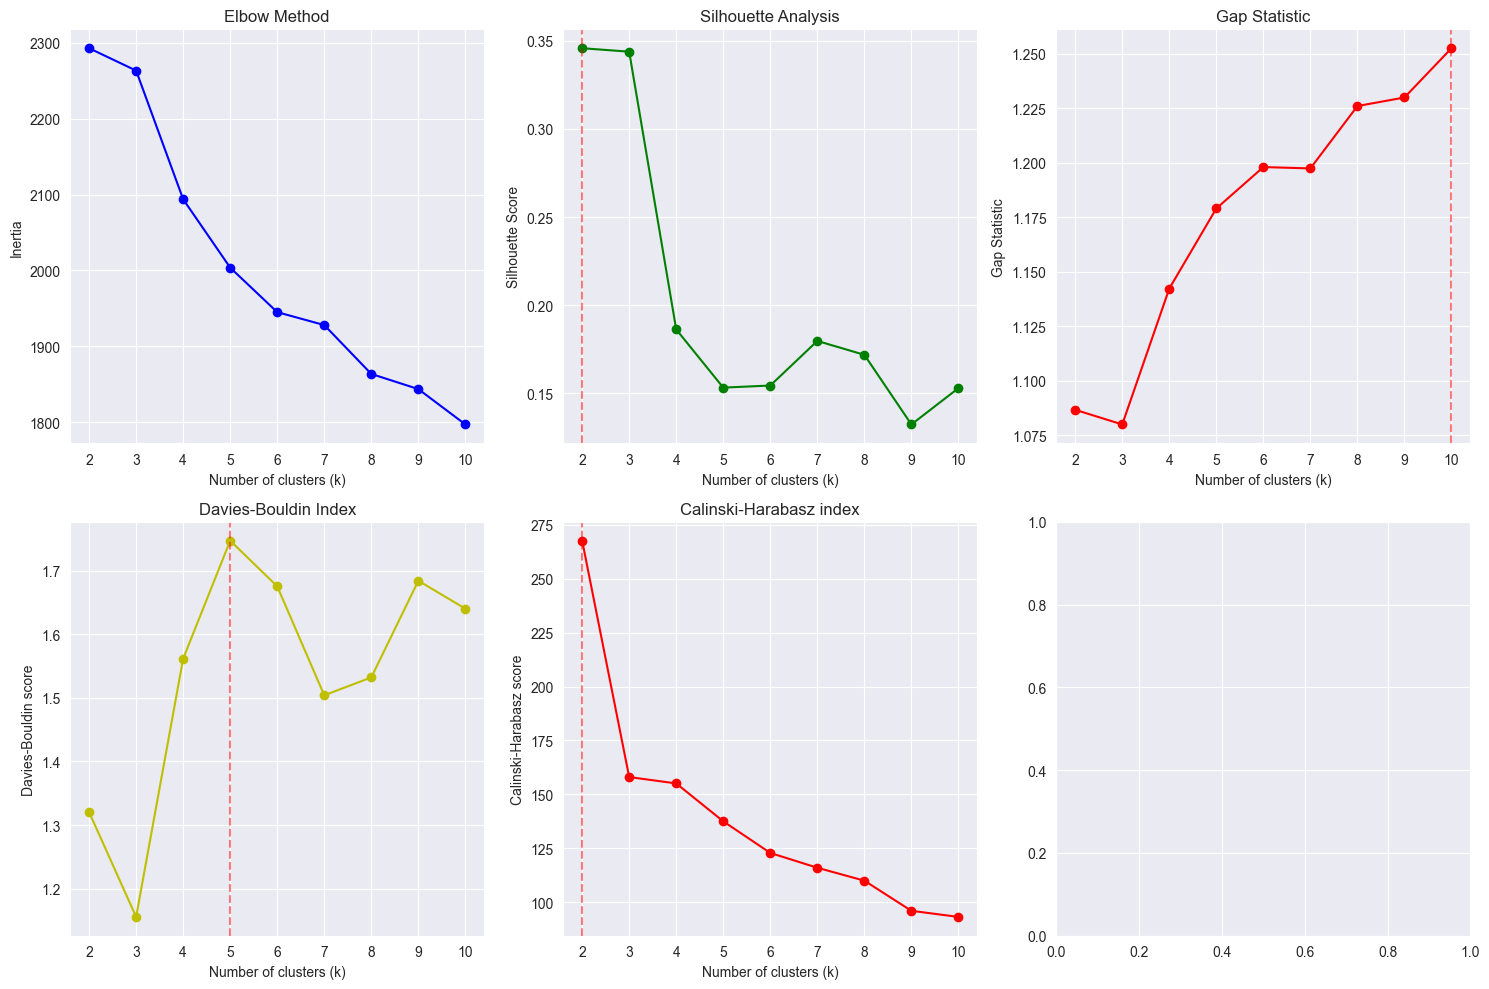

Best k by Silhouette Score: 2 (score: 0.3458)
Best k by Gap Statistic: 10 (gap: 1.2526)
Best k by Davies-Bouldin: 5 (gap: 1.7470)
Best k by Calinski-Harabasz: 2 (gap: 267.6917)
Check the Elbow plot for visual inflection point


{'k_values': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'inertias': [np.float64(2292.757854976681),
  np.float64(2263.278532974142),
  np.float64(2093.7520764080305),
  np.float64(2003.6615692007142),
  np.float64(1945.0328874188792),
  np.float64(1928.0094415176675),
  np.float64(1863.6018834419583),
  np.float64(1843.654760625212),
  np.float64(1797.0653169350046)],
 'silhouette_scores': [np.float64(0.34580801570340736),
  np.float64(0.34383862099594137),
  np.float64(0.18617026844348694),
  np.float64(0.15315191949589452),
  np.float64(0.15433637178584114),
  np.float64(0.17964504859616856),
  np.float64(0.1717637443412079),
  np.float64(0.1322442289244428),
  np.float64(0.15286671873209098)],
 'davies_bouldin_scores': [np.float64(1.3205098372342037),
  np.float64(1.155728074879873),
  np.float64(1.561681686395852),
  np.float64(1.7470160831587052),
  np.float64(1.675241228608349),
  np.float64(1.50401421004586),
  np.float64(1.5321286408643053),
  np.float64(1.68405950030776),
  np.float64(1.6

In [4]:
kmeans.find_best_k()

inertia = 1920.1134324212396
Silhouette score = 0.1563167533169799
Gap score = 1.2040332912924292
Davies-Bouldin index = 1.7354687471398795
Calinki-Harabasz index = 111.5125395114496


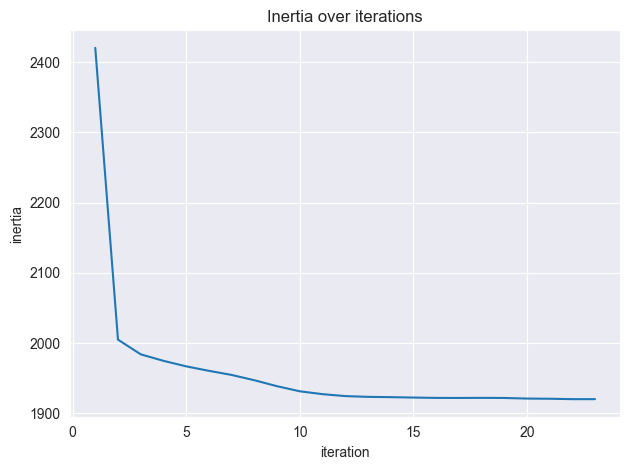

In [5]:
clusters, centroids, results = kmeans.fit(7, plot_metrics=True)

inertia = 1892.3637041013308
Silhouette score = 0.16770125419762175
Gap score = 1.216174148727669
Davies-Bouldin index = 1.65340992925078
Calinki-Harabasz index = 116.5199100459606


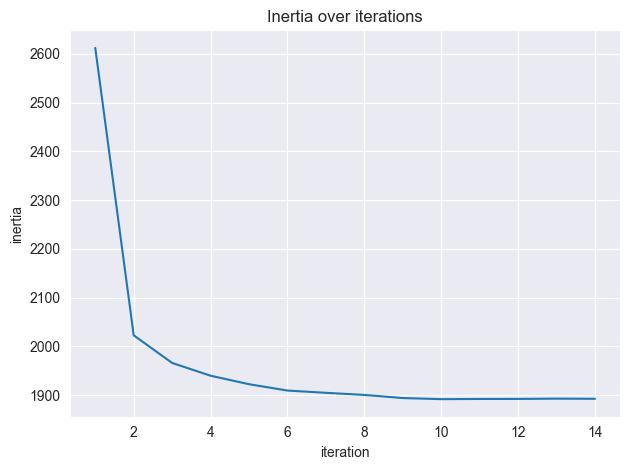

(array([2, 6, 6, 4, 6, 4, 6, 4, 4, 4, 3, 6, 2, 5, 4, 4, 5, 4, 6, 5, 5, 1,
        4, 6, 6, 2, 4, 6, 4, 6, 2, 4, 6, 6, 4, 6, 5, 3, 3, 5, 3, 5, 2, 5,
        5, 6, 1, 4, 3, 3, 3, 3, 3, 6, 3, 1, 6, 5, 3, 1, 1, 1, 4, 1, 5, 5,
        1, 3, 0, 3, 6, 0, 4, 5, 3, 6, 1, 2, 2, 3, 1, 5, 2, 6, 3, 6, 5, 6,
        5, 5, 3, 5, 3, 3, 6, 6, 1, 1, 3, 5, 3, 1, 3, 1, 1, 4, 5, 3, 2, 5,
        1, 5, 0, 1, 5, 3, 0, 4, 4, 6, 3, 6, 2, 5, 3, 3, 5, 6, 5, 6, 5, 6,
        6, 3, 6, 3, 1, 3, 6, 1, 3, 6, 1, 3, 3, 5, 4, 5, 5, 3, 1, 0, 0, 3,
        5, 3, 6, 3, 3, 3, 1, 6, 6, 1, 6, 3, 3, 6, 6, 3, 3, 3, 5, 1, 1, 1,
        0, 6, 3, 3, 2, 2, 6, 3, 5, 1, 6, 3, 1, 3, 4, 1, 1, 4, 5, 3, 4, 6,
        6, 5, 5, 6, 2, 4, 5, 5, 1, 6, 5, 3, 6, 3, 2, 0, 4, 5, 5, 1, 6, 6,
        3, 5, 1, 5, 3, 3, 3, 5, 5, 4, 6, 3, 3, 6, 1, 3, 2, 6, 3, 6, 3, 3,
        4, 3, 6, 1, 3, 5, 1, 3, 2, 3, 2, 6, 6, 5, 2, 4, 2, 4, 6, 3, 6, 3,
        6, 2, 1, 3, 3, 5, 3, 3, 2, 1, 6, 1, 3, 6, 3, 3, 6, 1, 6, 5, 3, 3,
        5, 3, 0, 1, 0, 5, 5, 3, 3, 3, 

In [6]:
kmeans.fit(7, smart_initialization=False, plot_metrics=True)

In [7]:
from external_metrics import *

In [8]:
print(f"Adjusted rand index = {adjusted_rand_index(y, clusters)}")
print(f"Normalized mutual info = {normalized_mutual_info(y, clusters)}")
print(f"Purity = {purity_score(y, clusters)}")

Adjusted rand index = 0.27680136054492455
Normalized mutual info = 0.35893121116102733
Purity = 0.8875219683655536


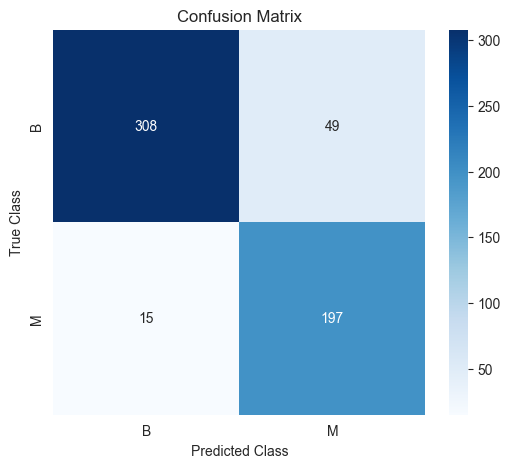

In [9]:
mapped_clusters = map_clusters_to_labels(clusters, assign_clusters_to_classes(y, clusters))
cm = confusion_matrix(y, mapped_clusters)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(mapped_clusters),
            yticklabels=np.unique(y))
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix")
plt.show()

In [10]:
print(compute_binary_metrics(y, mapped_clusters))

{'accuracy': np.float64(0.8875219683655536), 'precision': np.float64(0.8008130081300813), 'recall': np.float64(0.9292452830188679), 'f1': np.float64(0.8602620087336246), 'tp': np.int64(197), 'fp': np.int64(49), 'fn': np.int64(15), 'tn': np.int64(308)}
